In [7]:
from pandasai import Agent
from python_agent.python_ai import Python_Ai
from pandasai.responses.streamlit_response import StreamlitResponse
import pandas as pd
from langchain_community.llms import Ollama
def pandas_ai_agent(df, query):
    llm = Ollama(model= "llama3.1")
    pandas_ai = Agent(df, config={
        "llm":llm,
        "open_charts":False,
        "enable_cache" : False,
        "save_charts": True,
        "max_retries":1,
        "response_parser": StreamlitResponse
    })
    return [pandas_ai, pandas_ai.chat(query)]
df = pd.read_csv("../../../EDA/data/mac/Mac_2k.log_structured.csv")
ai = pandas_ai_agent(df, 'how many users are there and who are the different users')


Number of unique users: 38
Different users:
calvisitor-10-105-160-95
authorMacBook-Pro
calvisitor-10-105-163-202
calvisitor-10-105-160-237
calvisitor-10-105-160-184
calvisitor-10-105-162-32
calvisitor-10-105-161-225
airbears2-10-142-110-255
calvisitor-10-105-162-105
calvisitor-10-105-163-10
calvisitor-10-105-160-179
calvisitor-10-105-160-226
calvisitor-10-105-162-98
calvisitor-10-105-162-107
airbears2-10-142-108-38
calvisitor-10-105-163-9
calvisitor-10-105-160-210
calvisitor-10-105-162-81
calvisitor-10-105-161-231
calvisitor-10-105-160-22
calvisitor-10-105-162-211
calvisitor-10-105-162-138
calvisitor-10-105-163-28
calvisitor-10-105-160-37
calvisitor-10-105-163-168
calvisitor-10-105-163-253
calvisitor-10-105-162-178
calvisitor-10-105-160-205
calvisitor-10-105-161-77
calvisitor-10-105-160-85
calvisitor-10-105-160-47
calvisitor-10-105-163-147
calvisitor-10-105-162-175
calvisitor-10-105-162-108
calvisitor-10-105-162-228
calvisitor-10-105-161-176
calvisitor-10-105-160-181
calvisitor-10-105-

In [9]:
ai[0].explain()

"Let's break down the code step by step.\n\n**What are we trying to do?**\nWe're trying to answer two questions: How many different users are there, and who are these users?\n\n**Step 1: Counting the number of users**\n\nImagine you have a list of all the users. To count how many different users there are, you'd simply put them in a pile and count them one by one. That's what this line of code does:\n```python\nnum_users = len(dfs[0]['User'].unique())\n```\nIt takes the list of users ( stored in `dfs[0]['User']`) and counts how many unique items are there.\n\n**Step 2: Listing all different users**\n\nNow that we know how many users there are, let's make a list of all these users. We can do this by taking each user from the original list and adding it to our new list.\n```python\ndifferent_users = dfs[0]['User'].unique()\n```\nThis line creates a new list with all the unique users.\n\n**Step 3: Printing the results**\n\nTo make the answers more readable, we'll print them out in a nice 

In [17]:
ai[0].last_code_executed

"num_users = len(dfs[0]['User'].unique())\nprint('Number of unique users:', num_users)\ndifferent_users = dfs[0]['User'].unique()\nprint('Different users:')\nfor user in different_users:\n    print(user)\nresult = {'type': 'dataframe', 'value': dfs[0]}\nprint(result)"

In [46]:
from langchain_experimental.utilities import PythonREPL
def code_parser(df, python_code):
        try:
            python_code =python_code.split('\n')#python_code.group(1).split("\n")
            input_code = 'dfs=[df] \n'
        except:
            print("No code to input")
            return "No code available", ''
        
        for i in python_code:
            '''
            if plt.show() in i:
                plt.savefig('output.png)
                        or
                st.plotly_chart(plt, theme='streamlit', use_container_width=True)
            '''
    
            if "pd.read_csv(" in i:
                continue
            if "pd.DataFrame(" in i:
                continue
            if len(i) == 0:
                continue
            elif len(i) > 1 and "#" in i:
                i = i[0: i.find("#")]
                # print(i)
                if len(i) >= 1:
                    input_code+=i+"\n"
            else:
                input_code += i+"\n"
        repl = PythonREPL(_globals={"df": df})
        # print(input_code)
        out = repl.run(input_code)
        return out, input_code

In [47]:
ai[0].last_code_generated

'# Import the required dependencies\nimport pandas as pd\n\n# Declare variables\ndfs = [pd.DataFrame({\n    "LineId": [809, 1195, 1986],\n    "Month": ["Jul", "Jul", "Jul"],\n    "Date": ["5", "8", "7"],\n    "Time": ["12:59:11", "04:17:24", "19:16:35"],\n    "User": ["calvisitor-10-105-162-105", "calvisitor-10-105-161-176", "calvisitor-10-105-162-178"],\n    "Component": ["iconservicesagent", "loginwindow", "corecaptured"],\n    "PID": [34203, 33632, 35628],\n    "Address": ["[38132]", "", "[31382]"],\n    "Content": ["RTC: Maintenance 2017/7/1 21:52:00, sleep 2017/7/1 21:39:51", "hibernate_setup(0) took 4429 ms", "00:03:36.715 : BTLE scanning started"],\n    "EventId": ["E319", "E220", "E38"],\n    "EventTemplate": ["Peripheral manager is not powered on", "AppleActuatorHIDEventDriver: stop", "[<*>:<*>:<*>.<*>] <<<< CRABS >>>> crabsWaitForLoad: [<*>] Wait time out - <*> (msRequestTimeout <*>)"],\n})]\n\n# Count the number of users\nnum_users = len(dfs[0]["User"].unique())\nprint("Numb

In [49]:
a, b= code_parser(df, ai[0].last_code_executed)

In [54]:
ai[0].

In [56]:
b

"dfs=[df] \nnum_users = len(dfs[0]['User'].unique())\nprint('Number of unique users:', num_users)\ndifferent_users = dfs[0]['User'].unique()\nprint('Different users:')\nfor user in different_users:\n    print(user)\nresult = {'type': 'dataframe', 'value': dfs[0]}\nprint(result)\n"

In [ ]:
ai2

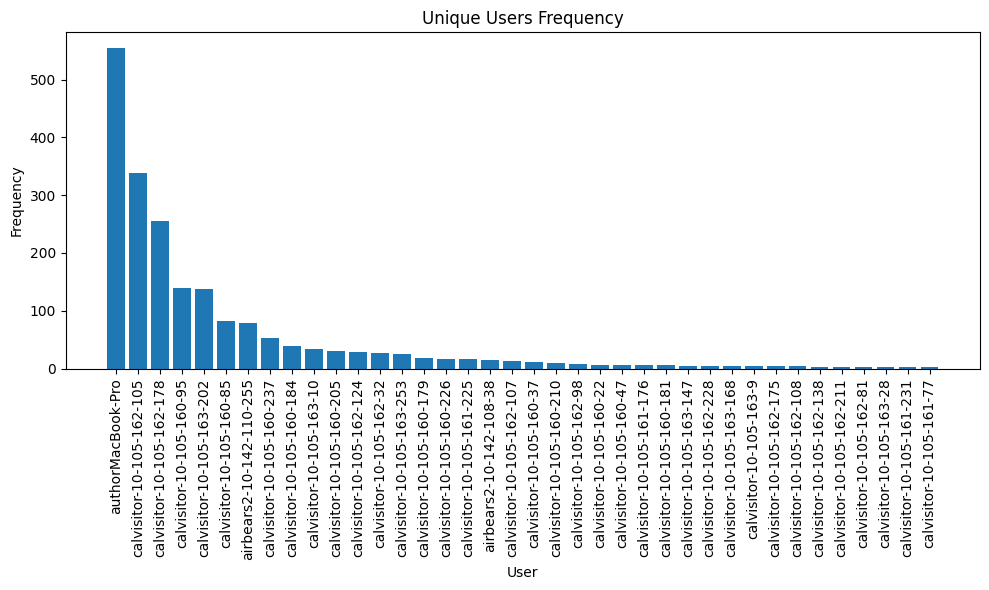

In [60]:
ai2 = pandas_ai_agent(df, 'give me the graph of the unique user')

In [59]:
ai2[1]

'exports/charts/79e5e8fc-517e-4abf-90b6-fb042fc52bb8.png'

In [61]:
ai[1]

,LineId,Month,Date,Time,User,Component,PID,Address,Content,EventId,EventTemplate
0,1,Jul,1,09:00:55,calvisitor-10-105-160-95,kernel,0,NaN,IOThunderboltSwitch<0>(0x0)::listenerCallback ...,E252,IOThunderboltSwitch<<*>>(<*>)::listenerCallbac...
1,2,Jul,1,09:01:05,calvisitor-10-105-160-95,com.apple.CDScheduler,43,NaN,Thermal pressure state: 1 Memory pressure stat...,E323,Thermal pressure state: <*> Memory pressure st...
2,3,Jul,1,09:01:06,calvisitor-10-105-160-95,QQ,10018,NaN,FA||Url||taskID[2019352994] dealloc,E216,FA||Url||taskID[<*>] dealloc
3,4,Jul,1,09:02:26,calvisitor-10-105-160-95,kernel,0,NaN,ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...,E128,ARPT: <*>.<*>: AirPort_<*>::syncPowerState: WW...
4,5,Jul,1,09:02:26,authorMacBook-Pro,kernel,0,NaN,ARPT: 620702.879952: AirPort_Brcm43xx::platfor...,E124,ARPT: <*>.<*>: AirPort_<*>::platformWoWEnable:...
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Jul,8,07:32:03,calvisitor-10-105-162-124,kernel,0,NaN,ARPT: 790564.863081: wl0: MDNS: IPV6 Addr: 260...,E142,ARPT: <*>.<*>: wl0: MDNS: IPV6 Addr: <*>
1996,1997,Jul,8,07:43:38,calvisitor-10-105-162-124,kernel,0,NaN,USBMSC Identifier (non-unique): 000000000820 0...,E331,USBMSC Identifier (non-unique): <*>
1997,1998,Jul,8,07:57:11,calvisitor-10-105-162-124,kernel,0,NaN,AppleCamIn::systemWakeCall - messageType = 0xE...,E120,AppleCamIn::systemWakeCall - messageType = <*>
1998,1999,Jul,8,08:10:46,calvisitor-10-105-162-124,kernel,0,NaN,Wake reason: RTC (Alarm),E338,Wake reason: RTC (Alarm)


In [62]:
ai2[1]

'exports/charts/dfabeab4-5073-43c7-b901-489953eeeed7.png'

,LineId,Month,Date,Time,User,Component,PID,Address,Content,EventId,EventTemplate
0,1,Jul,1,09:00:55,calvisitor-10-105-160-95,kernel,0,NaN,IOThunderboltSwitch<0>(0x0)::listenerCallback ...,E252,IOThunderboltSwitch<<*>>(<*>)::listenerCallbac...
1,2,Jul,1,09:01:05,calvisitor-10-105-160-95,com.apple.CDScheduler,43,NaN,Thermal pressure state: 1 Memory pressure stat...,E323,Thermal pressure state: <*> Memory pressure st...
2,3,Jul,1,09:01:06,calvisitor-10-105-160-95,QQ,10018,NaN,FA||Url||taskID[2019352994] dealloc,E216,FA||Url||taskID[<*>] dealloc
3,4,Jul,1,09:02:26,calvisitor-10-105-160-95,kernel,0,NaN,ARPT: 620701.011328: AirPort_Brcm43xx::syncPow...,E128,ARPT: <*>.<*>: AirPort_<*>::syncPowerState: WW...
4,5,Jul,1,09:02:26,authorMacBook-Pro,kernel,0,NaN,ARPT: 620702.879952: AirPort_Brcm43xx::platfor...,E124,ARPT: <*>.<*>: AirPort_<*>::platformWoWEnable:...
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Jul,8,07:32:03,calvisitor-10-105-162-124,kernel,0,NaN,ARPT: 790564.863081: wl0: MDNS: IPV6 Addr: 260...,E142,ARPT: <*>.<*>: wl0: MDNS: IPV6 Addr: <*>
1996,1997,Jul,8,07:43:38,calvisitor-10-105-162-124,kernel,0,NaN,USBMSC Identifier (non-unique): 000000000820 0...,E331,USBMSC Identifier (non-unique): <*>
1997,1998,Jul,8,07:57:11,calvisitor-10-105-162-124,kernel,0,NaN,AppleCamIn::systemWakeCall - messageType = 0xE...,E120,AppleCamIn::systemWakeCall - messageType = <*>
1998,1999,Jul,8,08:10:46,calvisitor-10-105-162-124,kernel,0,NaN,Wake reason: RTC (Alarm),E338,Wake reason: RTC (Alarm)
